# Pranata Eka Pramudya
# 2109106077
### Posttest 6 
Dataset yang saya gunakan : *https://www.kaggle.com/datasets/mexwell/boxing-matches*

### Import Dataset

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('boxing_matches.csv')
df

,age_A,age_B,height_A,height_B,reach_A,reach_B,stance_A,stance_B,weight_A,weight_B,...,kos_A,kos_B,result,decision,judge1_A,judge1_B,judge2_A,judge2_B,judge3_A,judge3_B
0,35.0,27.0,179.0,175.0,178.0,179.0,orthodox,orthodox,160.0,160.0,...,33,34.0,draw,SD,110.0,118.0,115.0,113.0,114.0,114.0
1,26.0,31.0,175.0,185.0,179.0,185.0,orthodox,orthodox,164.0,164.0,...,34,32.0,win_A,UD,120.0,108.0,120.0,108.0,120.0,108.0
2,28.0,26.0,176.0,175.0,NaN,179.0,orthodox,orthodox,154.0,154.0,...,13,33.0,win_B,KO,NaN,NaN,NaN,NaN,NaN,NaN
3,25.0,29.0,175.0,174.0,179.0,180.0,orthodox,orthodox,155.0,155.0,...,32,19.0,win_A,KO,47.0,48.0,49.0,46.0,48.0,47.0
4,25.0,35.0,175.0,170.0,179.0,170.0,orthodox,orthodox,155.0,NaN,...,32,33.0,win_A,UD,118.0,110.0,119.0,109.0,117.0,111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387422,20.0,NaN,NaN,NaN,NaN,NaN,orthodox,orthodox,NaN,NaN,...,19,0.0,win_A,KO,NaN,NaN,NaN,NaN,NaN,NaN
387423,20.0,NaN,NaN,NaN,NaN,NaN,orthodox,orthodox,NaN,NaN,...,19,2.0,win_A,PTS,NaN,NaN,NaN,NaN,NaN,NaN
387424,20.0,26.0,NaN,NaN,NaN,NaN,orthodox,orthodox,NaN,NaN,...,18,3.0,win_A,TKO,NaN,NaN,NaN,NaN,NaN,NaN
387425,20.0,NaN,NaN,NaN,NaN,NaN,orthodox,orthodox,NaN,NaN,...,17,0.0,win_A,TKO,NaN,NaN,NaN,NaN,NaN,NaN


## Data Preprocessing

#### Data Cleaning 
Membersihkan nilai null pada dataset menggunakan strategy **most_frequent**

In [2]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'most_frequent')
df[['age_A']] = imputer.fit_transform(df[['age_A']])
df[['age_B']] = imputer.fit_transform(df[['age_B']])
df[['height_A']] = imputer.fit_transform(df[['height_A']])
df[['height_B']] = imputer.fit_transform(df[['height_B']])
df[['reach_A']] = imputer.fit_transform(df[['reach_A']])
df[['reach_B']] = imputer.fit_transform(df[['reach_B']])
df[['stance_A']] = imputer.fit_transform(df[['stance_A']])
df[['stance_B']] = imputer.fit_transform(df[['stance_B']])
df[['weight_A']] = imputer.fit_transform(df[['weight_A']])
df[['weight_B']] = imputer.fit_transform(df[['weight_B']])
df[['kos_B']] = imputer.fit_transform(df[['kos_B']])
df[['judge1_A']] = imputer.fit_transform(df[['judge1_A']])
df[['judge1_B']] = imputer.fit_transform(df[['judge1_B']])
df[['judge2_A']] = imputer.fit_transform(df[['judge2_A']])
df[['judge2_B']] = imputer.fit_transform(df[['judge2_B']])
df[['judge3_A']] = imputer.fit_transform(df[['judge3_A']])
df[['judge3_B']] = imputer.fit_transform(df[['judge3_B']])

In [3]:
df.isna().sum()

age_A       0
age_B       0
height_A    0
height_B    0
reach_A     0
reach_B     0
stance_A    0
stance_B    0
weight_A    0
weight_B    0
won_A       0
won_B       0
lost_A      0
lost_B      0
drawn_A     0
drawn_B     0
kos_A       0
kos_B       0
result      0
decision    0
judge1_A    0
judge1_B    0
judge2_A    0
judge2_B    0
judge3_A    0
judge3_B    0
dtype: int64

#### Membersihkan Data Duplikat

In [4]:
df.drop_duplicates(inplace = True)

In [5]:
df.duplicated().sum()

0

#### Normalisasi
Normalisasi data pada semua atribut karena semuanya memiliki rentang nilai yang jauh

In [6]:
from sklearn.preprocessing import MinMaxScaler
MinMax = MinMaxScaler()
df[['age_A','age_B','height_A','height_B','reach_A','reach_B','weight_A','weight_B','won_A','won_B','lost_A','lost_B','drawn_A','drawn_B','kos_A','kos_B','judge1_A','judge1_B','judge2_A','judge2_B','judge3_A','judge3_B']] = MinMax.fit_transform(df[['age_A','age_B','height_A','height_B','reach_A','reach_B','weight_A','weight_B','won_A','won_B','lost_A','lost_B','drawn_A','drawn_B','kos_A','kos_B','judge1_A','judge1_B','judge2_A','judge2_B','judge3_A','judge3_B']])

#### Ordinal Encoding
Melakukan Ordinal Encoding pada atribut **result** dan **decision**

In [7]:
from sklearn.preprocessing import OrdinalEncoder

ordinal = OrdinalEncoder()
df["result"] = ordinal.fit_transform(df[["result"]])
df["decision"] = ordinal.fit_transform(df[["decision"]])

#### Membagi dataset menjadi **Train** dan **Test**
Dataset dibagi menjadi 2 dengan proporsi 70% untuk Train Size dan 30 % untuk Test Size
Random_state digunakan agar saat melakukan perulangan dalam pelatihan data tetap konsisten

In [8]:
from sklearn.model_selection import train_test_split

X = df[['age_A','age_B','height_A','height_B','reach_A','reach_B','weight_A','weight_B','won_A','won_B','lost_A','lost_B','drawn_A','drawn_B','kos_A','kos_B','decision','judge1_A','judge1_B','judge2_A','judge2_B','judge3_A','judge3_B']]
y = df['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

#### Sequential Model
Menggunakan Activation Function relu pada hidden layer dan mengguanakan Activation Function Softmax karena kelas pada output lebih dari dua kelas dan menggunakan loss **sparse_categorical_crossentropy** karena target telah dilakukan Ordinal Encoding

In [9]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers, callbacks

model = Sequential([
    layers.Dense(16, activation='relu', input_shape=[23]),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#### Callback
Penggunaan callback untuk menghindari terjadinya overfitting dengan menggunakan **Early Stopping** dalam variabel es. Callback digunakan apabila pada **Val_accuracy** tidak ada kenaikan performa dalam 5 kali iterasi, maka train akan dihentikan dan mengembalikan nilai **restore_best_weights** pada iterasi latihan terbaik.

In [10]:
es = callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    verbose=1,
    restore_best_weights = True
)

#### Melatih Model DNN 
Melakukan latihan dengan data train dan validation split sebesar 30 % dan epochs sebanyak 1000.

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                384       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 1027 (4.01 KB)
Trainable params: 1027 (4.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.3,batch_size = 25, verbose=1, callbacks=[es])

Epoch 1/100
6974/6974 [==============================] - 17s 2ms/step - loss: 0.4986 - accuracy: 0.8281 - val_loss: 0.4731 - val_accuracy: 0.8305
Epoch 2/100
6974/6974 [==============================] - 16s 2ms/step - loss: 0.4702 - accuracy: 0.8300 - val_loss: 0.4576 - val_accuracy: 0.8314
Epoch 3/100
6974/6974 [==============================] - 16s 2ms/step - loss: 0.4609 - accuracy: 0.8305 - val_loss: 0.4501 - val_accuracy: 0.8321
Epoch 4/100
6974/6974 [==============================] - 16s 2ms/step - loss: 0.4531 - accuracy: 0.8315 - val_loss: 0.4459 - val_accuracy: 0.8323
Epoch 5/100
6974/6974 [==============================] - 16s 2ms/step - loss: 0.4484 - accuracy: 0.8318 - val_loss: 0.4405 - val_accuracy: 0.8333
Epoch 6/100
6974/6974 [==============================] - 16s 2ms/step - loss: 0.4446 - accuracy: 0.8330 - val_loss: 0.4426 - val_accuracy: 0.8334
Epoch 7/100
6974/6974 [==============================] - 16s 2ms/step - loss: 0.4422 - accuracy: 0.8338 - val_loss: 0.4415 -

#### Evaluasi Model
Model yang telah dilatih akan dievaluasi dengan mengembalikan nilai loss.

In [13]:
model.evaluate(X_test, y_test)

3336/3336 [==============================] - 5s 2ms/step - loss: 0.4205 - accuracy: 0.8457


[0.4204613268375397, 0.845650851726532]

### Grafik Akurasi

In [14]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

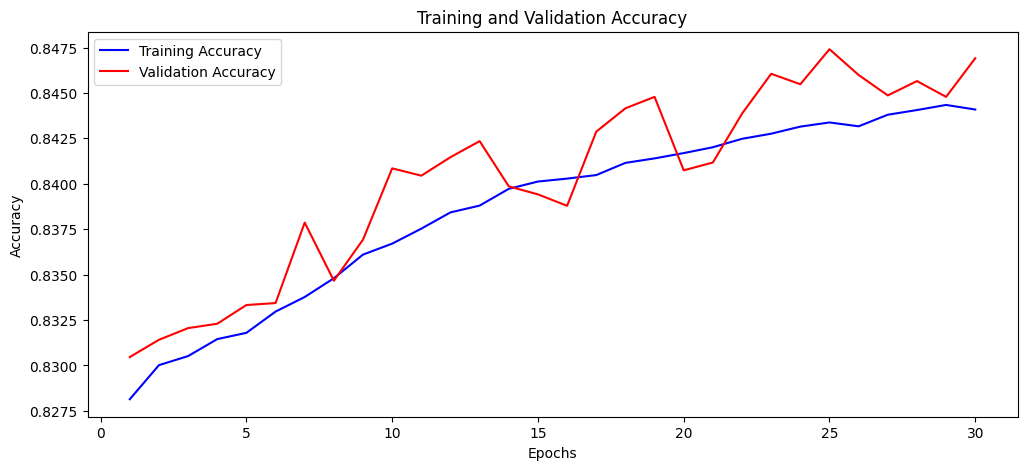

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(range(1, len(training_accuracy) + 1), training_accuracy, label='Training Accuracy', color='blue')
plt.plot(range(1, len(validation_accuracy) + 1), validation_accuracy, label='Validation Accuracy',  color='red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Grafik Loss

In [16]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

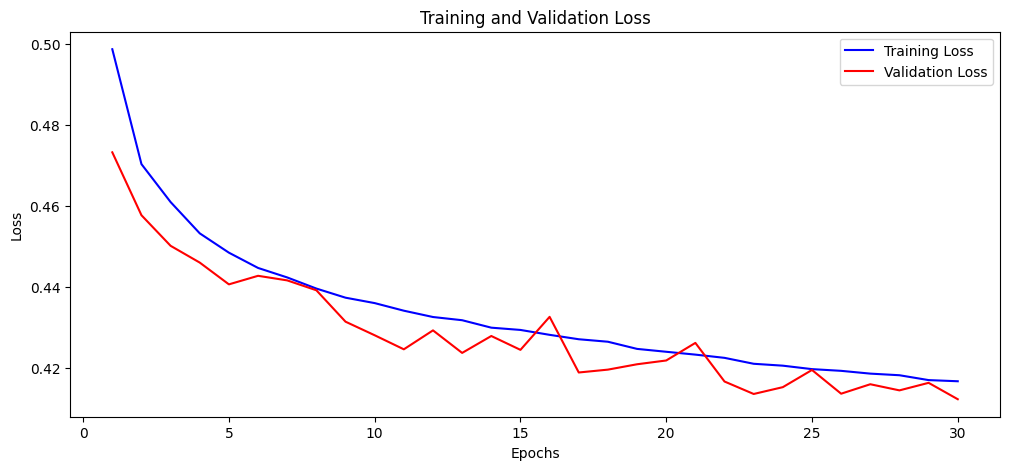

In [17]:
plt.figure(figsize=(12, 5))
plt.plot(range(1, len(training_loss) + 1), training_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(validation_loss) + 1), validation_loss, label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()